In [1]:
    import pandas as pd 
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    %matplotlib inline

    import warnings
    warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel("C:\FLIGHT PRICE.xlsx")
data

,Unnamed: 0,Airline Names,Departure Time,Arrival Time,Source,Destination,Total Stops,Stopping Airports,Total Flight Time,Date of journey(in 2022),Fair Price
0,0,Etihad Airways,04:35,16:10,Bengaluru,New York,1 stop,Abu Dhabi,22 h 05,Oct 25,"₹ 45,338"
1,1,Delta Air Lines,02:40,12:30,Bengaluru,New York,1 stop,Amsterdam,20 h 20,Oct 25,"₹ 51,469"
2,2,Delta Air Lines,02:40,14:30,Bengaluru,New York,1 stop,Amsterdam,22 h 20,Oct 25,"₹ 51,469"
3,3,Delta Air Lines,02:40,16:30,Bengaluru,New York-LaGua,2 stop,"Amsterdam,Boston",24 h 20,Oct 25,"₹ 60,820"
4,4,Delta Air Lines,02:40,11:12,Bengaluru,+ 1 DAY\nNewark,2 stop,"Amsterdam,Minneapolis",43 h 02,Oct 25,"₹ 51,916"
...,...,...,...,...,...,...,...,...,...,...,...
1649,1649,"Air India, British Airways",13:35,20:45,New Delhi,London - City,1 stop,Frankfurt,12 h 40,Dec 4,"₹ 2,07,064"
1650,1650,"Air India, British Airways",13:35,21:20,New Delhi,London - Heath,1 stop,Frankfurt,13 h 15,Dec 4,"₹ 2,07,064"
1651,1651,"Vistara, Singapore Airlines",19:45,15:20,New Delhi,+ 1 DAY\nLondon,2 stop,"Mumbai,Singapore",25 h 05,Dec 4,"₹ 3,23,405"
1652,1652,"Vistara, Singapore Airlines",19:00,15:20,New Delhi,+ 1 DAY\nLondon,2 stop,"Mumbai,Singapore",25 h 50,Dec 4,"₹ 3,23,405"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1654 entries, 0 to 1653
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                1654 non-null   int64 
 1   Airline Names             1654 non-null   object
 2   Departure Time            1654 non-null   object
 3   Arrival Time              1654 non-null   object
 4   Source                    1654 non-null   object
 5   Destination               1654 non-null   object
 6   Total Stops               1654 non-null   object
 7   Stopping Airports         1624 non-null   object
 8   Total Flight Time         1654 non-null   object
 9   Date of journey(in 2022)  1654 non-null   object
 10  Fair Price                1654 non-null   object
dtypes: int64(1), object(10)
memory usage: 142.3+ KB


In [4]:
data.isnull().sum()

Unnamed: 0                   0
Airline Names                0
Departure Time               0
Arrival Time                 0
Source                       0
Destination                  0
Total Stops                  0
Stopping Airports           30
Total Flight Time            0
Date of journey(in 2022)     0
Fair Price                   0
dtype: int64

In [5]:
data.shape

(1654, 11)

Mumbai                               140
London - Heathrow Apt                 81
Doha                                  72
Dubai                                 49
Hyderabad                             42
                                    ... 
Munich,Amsterdam                       1
New Delhi,Dubai,Athens                 1
Mumbai,Helsinki                        1
London - Heathrow Apt,Minneapolis      1
Hong Kong                              1
Name: Stopping Airports, Length: 151, dtype: int64


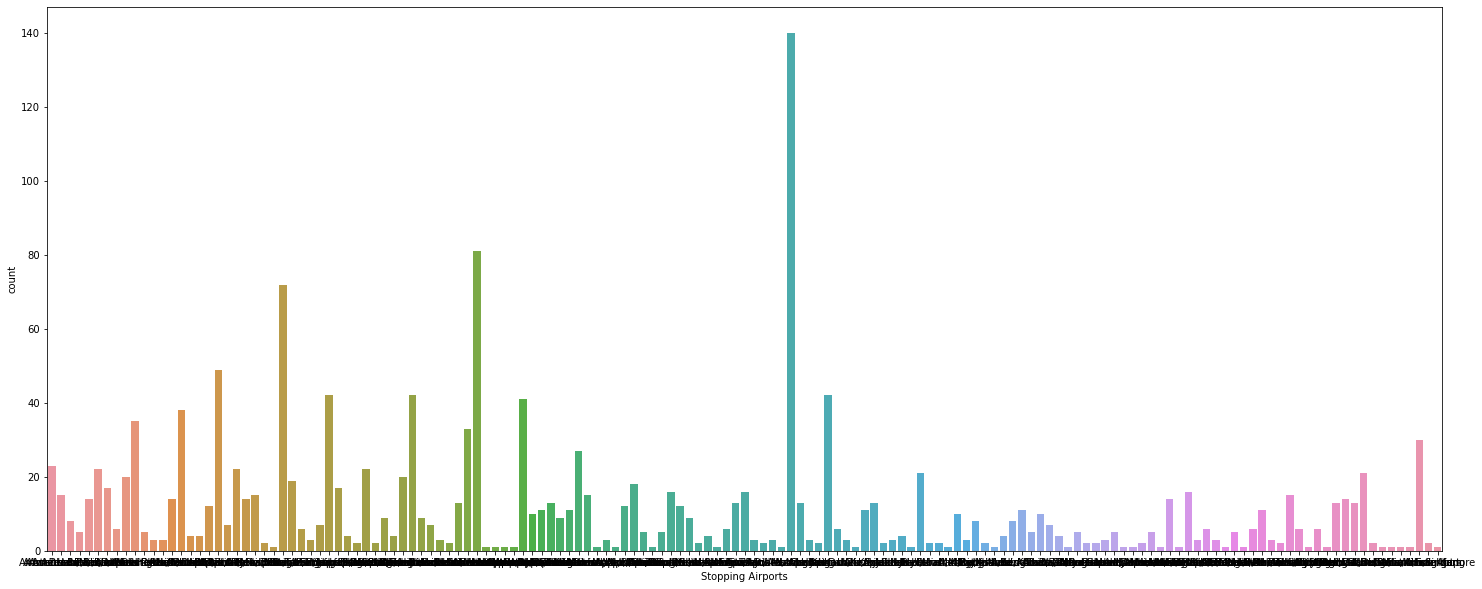

In [6]:
plt.figure(figsize=(25,10))
sns.countplot(data['Stopping Airports'])
print(data['Stopping Airports'].value_counts())

In [7]:
data['Stopping Airports'] = data['Stopping Airports'].fillna('Mumbai')

In [8]:
data.isnull().sum()

Unnamed: 0                  0
Airline Names               0
Departure Time              0
Arrival Time                0
Source                      0
Destination                 0
Total Stops                 0
Stopping Airports           0
Total Flight Time           0
Date of journey(in 2022)    0
Fair Price                  0
dtype: int64

In [11]:
data = data.drop('Date of journey(in 2022)',axis=1)

In [12]:
data = data.drop('Unnamed: 0',axis=1)

In [13]:
data['Departure Time'] = data['Departure Time'].str.replace(':','').astype(int)

In [14]:
data['Arrival Time'] = data['Arrival Time'].str.replace(':','').astype(int)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1654 entries, 0 to 1653
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline Names      1654 non-null   object
 1   Departure Time     1654 non-null   int32 
 2   Arrival Time       1654 non-null   int32 
 3   Source             1654 non-null   object
 4   Destination        1654 non-null   object
 5   Total Stops        1654 non-null   object
 6   Stopping Airports  1654 non-null   object
 7   Total Flight Time  1654 non-null   object
 8   Fair Price         1654 non-null   object
dtypes: int32(2), object(7)
memory usage: 103.5+ KB


New Delhi     846
Bengaluru     627
Chandigarh    181
Name: Source, dtype: int64


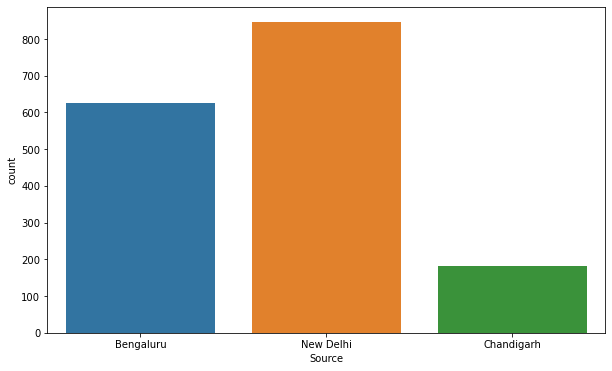

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(data['Source'])
print(data['Source'].value_counts())

+ 1 DAY\nNew Yo                    222
+ 1 DAY\nNewark                    197
New York                           195
Dubai                              173
+ 1 DAY\nDubai                     156
Newark                             132
+ 1 DAY\nLondon                    122
London - Heath                     113
+ 1 DAY\nSharja                     92
+ 1 DAY\nNew York                   71
New York-LaGua                      28
Sharjah\n(19 KM                     26
New York-LaGuardia Apt              25
+ 2 DAY\nLondon                     20
London - City                       20
Ras Al Khaimah                      17
+ 2 DAY\nNew Yo                     13
+ 1 DAY\nNew York-LaGuardia Apt     11
London - Gatwi                       7
+ 1 DAY\nRas Al                      6
+ 2 DAY\nSharja                      3
+ 2 DAY\nNewark                      3
London - Stans                       2
Name: Destination, dtype: int64


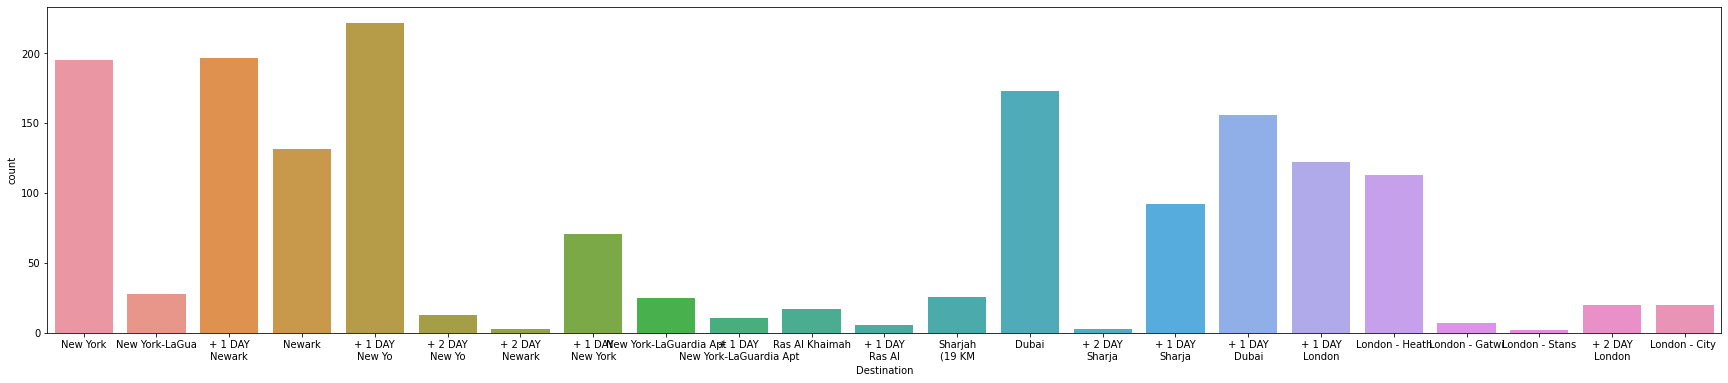

In [17]:
plt.figure(figsize=(30,6))
sns.countplot(data['Destination'])
print(data['Destination'].value_counts())

In [18]:
data['Destination'] = data['Destination'].replace('+ 1 DAY\nNewark','New York')

In [19]:
data['Destination'] = data['Destination'].replace('Newark','New York')

In [20]:
data['Destination'] = data['Destination'].replace('+ 1 DAY\nNew York','New York')

In [21]:
data['Destination'] = data['Destination'].replace('New York-LaGua','New York')

In [22]:
data['Destination'] = data['Destination'].replace('New York-LaGuardia Apt','New York')

In [23]:
data['Destination'] = data['Destination'].replace('+ 2 DAY\nNew Yo','New York')

In [24]:
data['Destination'] = data['Destination'].replace('+ 1 DAY\nNew York-LaGuardia Apt','New York')

In [25]:
data['Destination'] = data['Destination'].replace('+ 1 DAY\nDubai','Dubai')
data['Destination'] = data['Destination'].replace('+ 1 DAY\nSharja','Dubai')
data['Destination'] = data['Destination'].replace('Sharjah\n(19 KM','Dubai')
data['Destination'] = data['Destination'].replace('Ras Al Khaimah','Dubai')
data['Destination'] = data['Destination'].replace('+ 1 DAY\nRas Al','Dubai')
data['Destination'] = data['Destination'].replace('+ 2 DAY\nSharja','Dubai')
data['Destination'] = data['Destination'].replace('+ 2 DAY\nNewark','Dubai')

In [26]:
data['Destination'] = data['Destination'].replace('+ 1 DAY\nLondon','London - City')
data['Destination'] = data['Destination'].replace('London - Heath','London - City')
data['Destination'] = data['Destination'].replace('+ 2 DAY\nLondon','London - City')
data['Destination'] = data['Destination'].replace('London - Gatwi','London - City')
data['Destination'] = data['Destination'].replace('London - Stans','London - City')

New York           672
Dubai              476
London - City      264
+ 1 DAY\nNew Yo    222
London - City       20
Name: Destination, dtype: int64


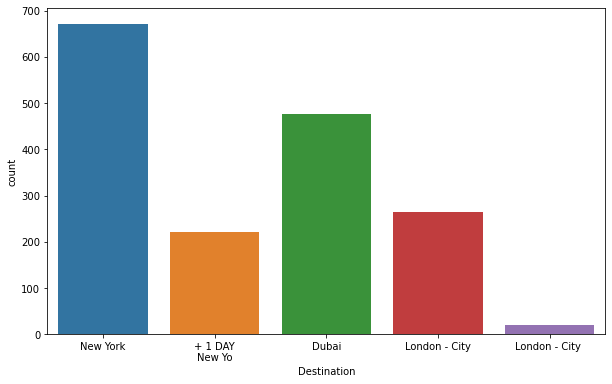

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(data['Destination'])
print(data['Destination'].value_counts())

IndiGo                          165
Delta Air Lines                 156
Lufthansa                        89
Vistara, Emirates                88
Vistara, Air France              86
                               ... 
Go First, Singapore Airlines      1
Air India, Emirates               1
Biman Bangladesh                  1
Akasa Air, IndiGo                 1
Cathay Pacific                    1
Name: Airline Names, Length: 110, dtype: int64


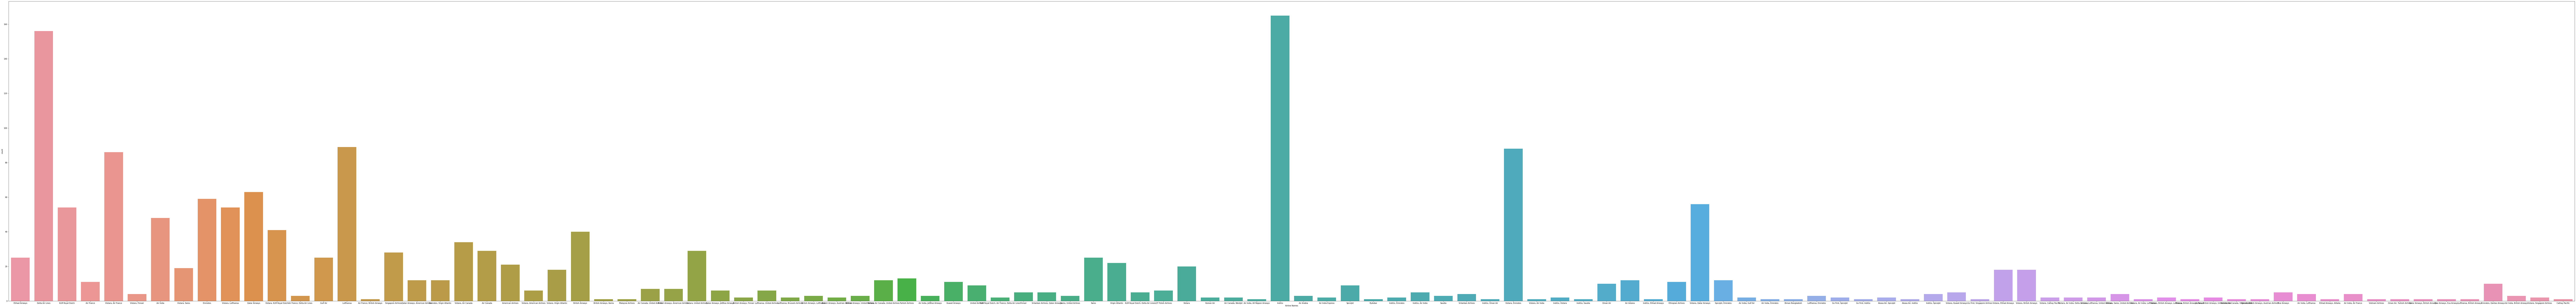

In [28]:
plt.figure(figsize=(250,30))
sns.countplot(data['Airline Names'])
print(data['Airline Names'].value_counts())

2 stop     847
1 stop     773
Non sto     30
3 stop       4
Name: Total Stops, dtype: int64


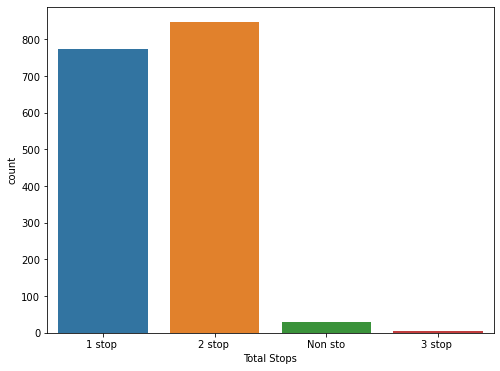

In [29]:
plt.figure(figsize=(8,6))
sns.countplot(data['Total Stops'])
print(data['Total Stops'].value_counts())

In [30]:
print(data['Total Flight Time'].value_counts())

25 h 25    14
27 h 20    12
22 h 15    12
28 h 25    11
35 h 25    11
           ..
23 h 25     1
27 h 19     1
10 h 44     1
13 h 45     1
11 h 25     1
Name: Total Flight Time, Length: 575, dtype: int64


In [31]:
data['Fair Price'] = data['Fair Price'].str.replace('₹','')

In [32]:
data['Fair Price'] = data['Fair Price'].str.replace(',','').astype(int)

In [33]:
data['Fair Price'] = data['Fair Price'].astype('int64')

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1654 entries, 0 to 1653
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline Names      1654 non-null   object
 1   Departure Time     1654 non-null   int32 
 2   Arrival Time       1654 non-null   int32 
 3   Source             1654 non-null   object
 4   Destination        1654 non-null   object
 5   Total Stops        1654 non-null   object
 6   Stopping Airports  1654 non-null   object
 7   Total Flight Time  1654 non-null   object
 8   Fair Price         1654 non-null   int64 
dtypes: int32(2), int64(1), object(6)
memory usage: 103.5+ KB


<AxesSubplot:xlabel='Airline Names', ylabel='Fair Price'>

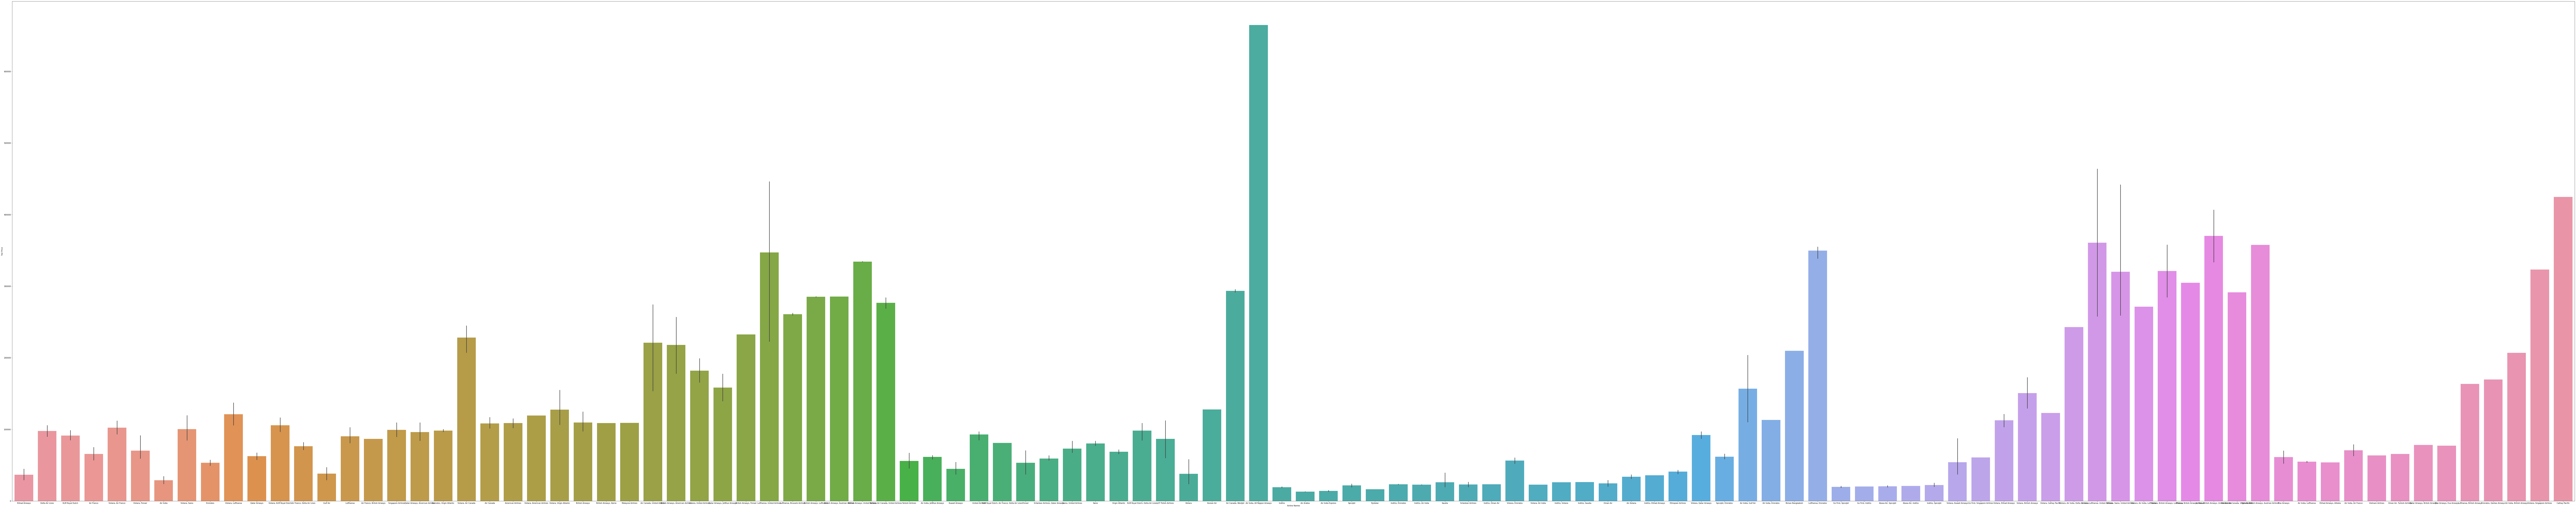

In [35]:
plt.figure(figsize=(250,50))
sns.barplot(x='Airline Names',y='Fair Price',data=data)

<AxesSubplot:xlabel='Airline Names', ylabel='Fair Price'>

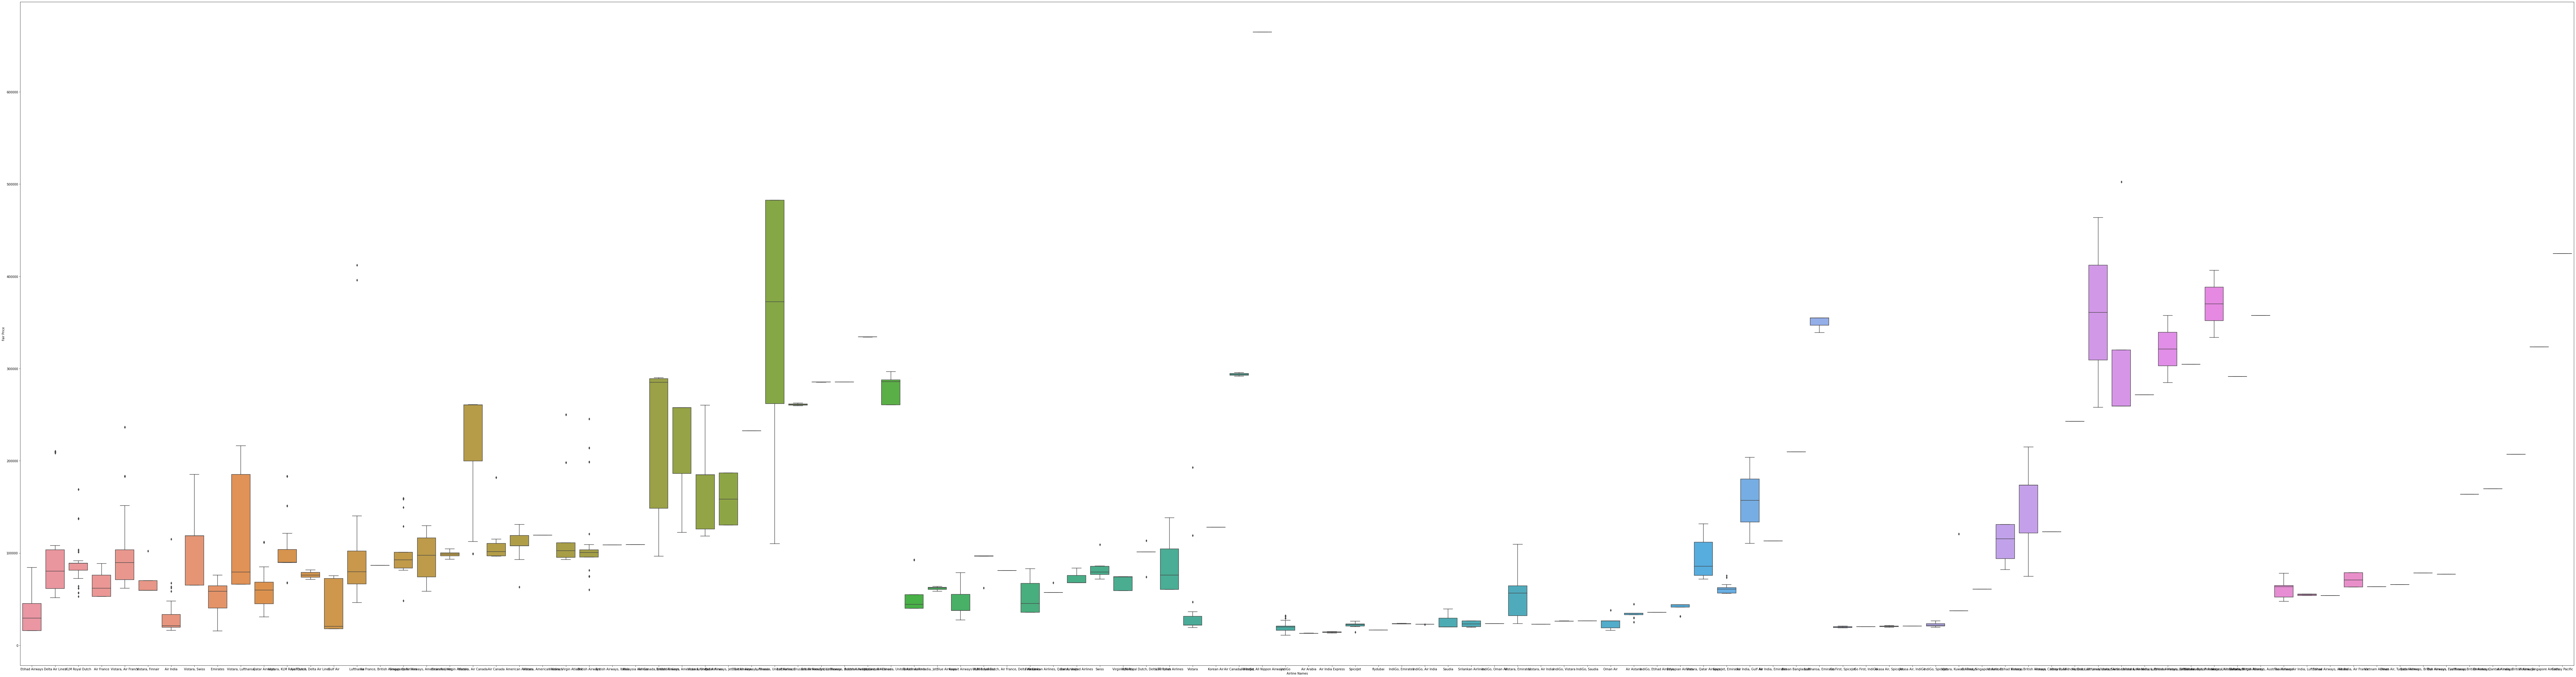

In [36]:
plt.figure(figsize=(150,40))
sns.boxplot(x='Airline Names',y='Fair Price',data=data)

<AxesSubplot:xlabel='Source', ylabel='Fair Price'>

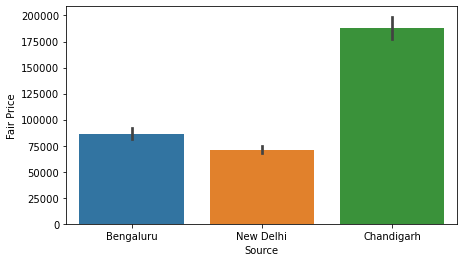

In [37]:
plt.figure(figsize=(7,4))
sns.barplot(x='Source',y='Fair Price',data=data)

In [38]:
data['Total Flight Time'] = data['Total Flight Time'].str.replace(' h','')

In [39]:
data['Total Flight Time'] = data['Total Flight Time'].str.replace('\n','')

In [40]:
data['Total Flight Time'] = data['Total Flight Time'].str.replace(' ','')

In [41]:
data['Total Flight Time'] = data['Total Flight Time'].str.replace('No','')

In [42]:
data['Total Flight Time'] = data['Total Flight Time'].astype('int64')

<AxesSubplot:xlabel='Total Flight Time', ylabel='Fair Price'>

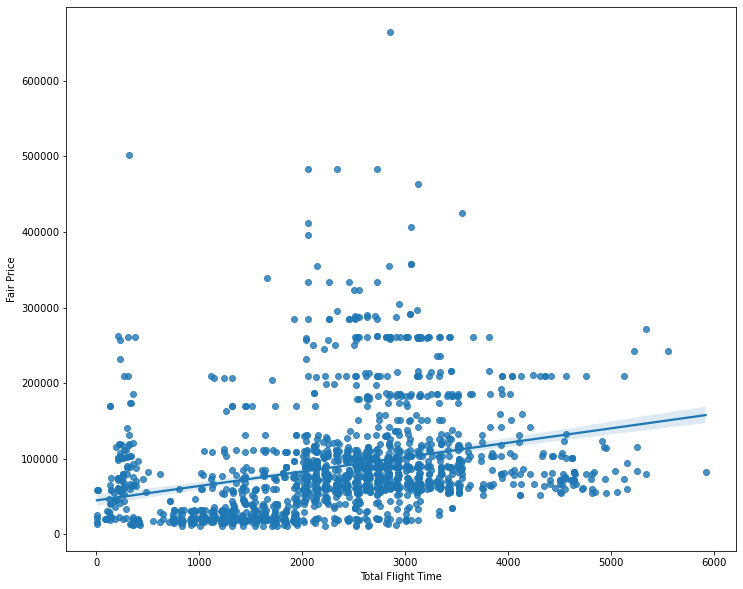

In [43]:
plt.figure(figsize=(12,10))
sns.regplot(x='Total Flight Time',y='Fair Price',data=data)

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
le = LabelEncoder()
var_mode = ['Airline Names','Source','Destination','Total Stops','Stopping Airports']

for i in var_mode:
    data[i] = le.fit_transform(data[i])

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1654 entries, 0 to 1653
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Airline Names      1654 non-null   int32
 1   Departure Time     1654 non-null   int32
 2   Arrival Time       1654 non-null   int32
 3   Source             1654 non-null   int32
 4   Destination        1654 non-null   int32
 5   Total Stops        1654 non-null   int32
 6   Stopping Airports  1654 non-null   int32
 7   Total Flight Time  1654 non-null   int64
 8   Fair Price         1654 non-null   int64
dtypes: int32(7), int64(2)
memory usage: 71.2 KB


In [48]:
data.describe()

,Airline Names,Departure Time,Arrival Time,Source,Destination,Total Stops,Stopping Airports,Total Flight Time,Fair Price
count,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000
mean,57.936518,1071.816808,1510.340387,1.132406,2.268440,0.571342,81.511487,2349.445586,89760.062273
std,30.840733,733.140249,538.910587,0.934647,1.546382,0.598992,39.572850,1059.119129,70933.531932
min,0.000000,5.000000,15.000000,0.000000,0.000000,0.000000,0.000000,4.000000,10896.000000
25%,30.000000,340.000000,1210.000000,0.000000,1.000000,0.000000,48.000000,1646.250000,44847.000000
50%,55.000000,945.000000,1600.000000,2.000000,2.000000,1.000000,89.000000,2455.000000,74738.000000
75%,85.000000,1850.000000,1935.000000,2.000000,4.000000,1.000000,114.000000,3005.000000,103527.000000
max,109.000000,2350.000000,2359.000000,2.000000,4.000000,3.000000,150.000000,5915.000000,664796.000000


In [49]:
data.corr()

,Airline Names,Departure Time,Arrival Time,Source,Destination,Total Stops,Stopping Airports,Total Flight Time,Fair Price
Airline Names,1.000000,0.348318,-0.087023,-0.123134,-0.202955,0.286248,0.188747,0.216676,0.200078
Departure Time,0.348318,1.000000,-0.222807,-0.119145,-0.371964,0.124593,0.139798,0.028096,0.065974
Arrival Time,-0.087023,-0.222807,1.000000,-0.049064,0.196123,0.041776,-0.021040,0.054621,-0.011337
Source,-0.123134,-0.119145,-0.049064,1.000000,0.112264,-0.120079,-0.239733,-0.117479,-0.126291
Destination,-0.202955,-0.371964,0.196123,0.112264,1.000000,0.049195,0.048805,0.236883,0.283110
Total Stops,0.286248,0.124593,0.041776,-0.120079,0.049195,1.000000,0.206844,0.258657,0.157302
Stopping Airports,0.188747,0.139798,-0.021040,-0.239733,0.048805,0.206844,1.000000,0.201369,0.274243
Total Flight Time,0.216676,0.028096,0.054621,-0.117479,0.236883,0.258657,0.201369,1.000000,0.284751
Fair Price,0.200078,0.065974,-0.011337,-0.126291,0.283110,0.157302,0.274243,0.284751,1.000000


<AxesSubplot:>

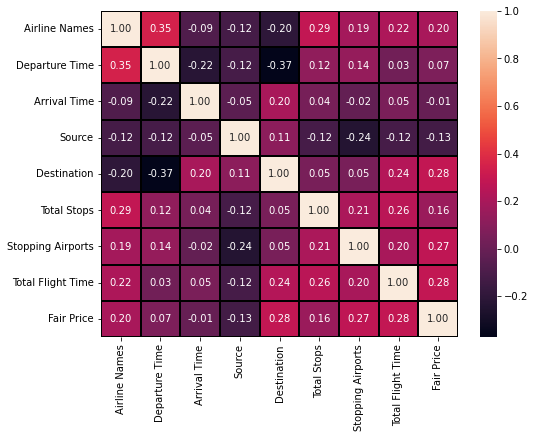

In [50]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),annot=True,linewidth = 0.2,linecolor = 'black',fmt='0.2f')

In [51]:
x= data.drop("Fair Price",axis=1)
y= data["Fair Price"]

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled= sc.fit_transform(x)

In [54]:
x_scaled.shape[1]

8

In [55]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["features"] = x.columns

vif

,vif,features
0,1.302201,Airline Names
1,1.333431,Departure Time
2,1.081868,Arrival Time
3,1.103821,Source
4,1.330087,Destination
5,1.172037,Total Stops
6,1.149318,Stopping Airports
7,1.217553,Total Flight Time


In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x= sc.fit_transform(x)

In [57]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [58]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print("At random state",i , "the training accuracy is",  {r2_score(y_train,pred_train)})
    
    print("At random state",i , "the testing accuracy is" , {r2_score(y_test,pred_test)})
    print("\n")

At random state 0 the training accuracy is {0.22480100169850248}
At random state 0 the testing accuracy is {0.21082241104332278}


At random state 1 the training accuracy is {0.2122526293694209}
At random state 1 the testing accuracy is {0.26041356882022126}


At random state 2 the training accuracy is {0.23955584389014195}
At random state 2 the testing accuracy is {0.17428602109189228}


At random state 3 the training accuracy is {0.21136013127569064}
At random state 3 the testing accuracy is {0.24611167104074394}


At random state 4 the training accuracy is {0.22294359691649945}
At random state 4 the testing accuracy is {0.22394650311703945}


At random state 5 the training accuracy is {0.21413938134726362}
At random state 5 the testing accuracy is {0.25249578338137224}


At random state 6 the training accuracy is {0.21918738337027943}
At random state 6 the testing accuracy is {0.23029368931841943}


At random state 7 the training accuracy is {0.2123721669889178}
At random state 7 th

In [59]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.25,random_state=1)

In [60]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print("Accuracy",r2_score(y_test,pred_lr)*100)

Accuracy 26.041356882022125


In [61]:
from sklearn.model_selection import cross_val_score

In [62]:
scr_lr = cross_val_score(lr,x_train,y_train,cv=3)
print("Cross Validation Score of Linear regression model is :- ",scr_lr.mean())

Cross Validation Score of Linear regression model is :-  0.20299182969259047


In [63]:
from sklearn import metrics

In [64]:
MAE = metrics.mean_absolute_error(y_test,pred_lr)
MSE = metrics.mean_squared_error(y_test,pred_lr)

In [65]:
print("mean absolute error:",MAE)
print("mean squared error:",MSE)

mean absolute error: 40893.806654151274
mean squared error: 3494890763.8878665


In [66]:
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 59117.60113441569


In [67]:
from sklearn.linear_model import Lasso

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
from sklearn.linear_model import Lasso
parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(2,10))}

ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 2}


In [70]:
ls = Lasso(alpha=10,random_state=2)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

In [71]:
lss = r2_score(y_test,pred_ls)
lss

0.26043339677448607

In [73]:
MAE = metrics.mean_absolute_error(y_test,pred_ls)
MSE = metrics.mean_squared_error(y_test,pred_ls)

In [74]:
print("mean absolute error:",MAE)
print("mean squared error:",MSE)

mean absolute error: 40892.70314262804
mean squared error: 3494797067.5579915


In [75]:
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 59116.80867196733


In [76]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
MAE = metrics.mean_absolute_error(y_test,pred_dec)
MSE = metrics.mean_squared_error(y_test,pred_dec)

In [ ]:
print("mean absolute error:",MAE)
print("mean squared error:",MSE)

In [ ]:
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

In [78]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

In [79]:
params = {'n_estimators':[47,50,60,70],'learning_rate':[0.25,0.30,0.40]}

In [83]:
ada = AdaBoostRegressor(learning_rate=0.3,n_estimators=47)

In [84]:
ada.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.3, n_estimators=47)

In [85]:
y_pred = ada.predict(x_test)

print(r2_score(y_test,y_pred))

0.3189168660804612


In [86]:
cv_score = cross_val_score(ada,x_train,y_train,cv=3)
cv_mean = cv_score.mean()
cv_mean

0.25965498927113795

In [87]:
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)

In [88]:
print("mean absolute error:",MAE)
print("mean squared error:",MSE)

mean absolute error: 47603.57704167966
mean squared error: 3218435403.6595254


In [89]:
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 56731.255967583915


In [90]:
from sklearn.ensemble import GradientBoostingRegressor

In [91]:
gbd = GradientBoostingRegressor()
gbd.fit(x_train,y_train)
pred_gbd=gbd.predict(x_test)
print("Accuracy",r2_score(y_test,pred_gbd)*100)

Accuracy 67.61150700490668


In [92]:
cv_score = cross_val_score(gbd,x_train,y_train,cv=3)
cv_mean = cv_score.mean()
cv_mean

0.593252094857844

In [93]:
MAE = metrics.mean_absolute_error(y_test,pred_gbd)
MSE = metrics.mean_squared_error(y_test,pred_gbd)

In [94]:
print("mean absolute error:",MAE)
print("mean squared error:",MSE)

mean absolute error: 24691.94804343116
mean squared error: 1530507324.8062768
